# Part 3

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
np.random.seed(5432)

In [62]:
def compute_W(datas):
    assert(len(datas) > 0)
    shape = np.shape(datas[0])

    W = datas[0] @ np.transpose(datas[0])
    for i in range(1, len(datas)):
        assert(np.shape(datas[i]) == shape)
        W += datas[i] @ np.transpose(datas[i])
    return W / shape[0]

def simulate(W, initial_pattern = None, sigma = 0.1):
    if initial_pattern is None:
        initial_pattern = np.random.choice([-1, 1], size=np.shape(W)[0])

    def f(t, y):
        return -y + np.sign(W @ y) + sigma * np.random.normal()
    sol = solve_ivp(f, [0, 1], initial_pattern, dense_output=True)
    t = np.linspace(0, 1.5, 12)

    fig, axarr = plt.subplots(4, 3, sharex=True, sharey=True)
    fig.subplots_adjust(hspace=0,wspace=0)

    sol = sol.sol(t)
    for i in range(len(t)):
        axarr[i // 3][i % 3].imshow(np.reshape(sol[:,i], (16, 16)))
        axarr[i // 3][i % 3].set_title("t = {:.2f}".format(t[i]))

    fig.tight_layout()
    plt.show()

## Question 1: Invent a pattern

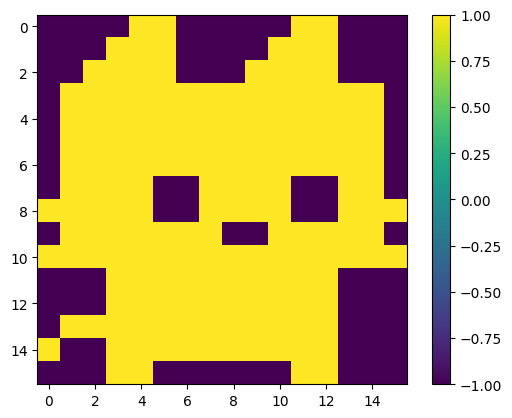

In [63]:
with Image.open("cat.png") as im:
    im = im.convert('1')
    data = np.array(im) * 2 - 1

plt.imshow(data)
plt.colorbar()
plt.savefig("figures/part3_cat.svg")
plt.show()

data = np.reshape(data, (256, 1))

## Question 2: Plot the matrix W and simulate

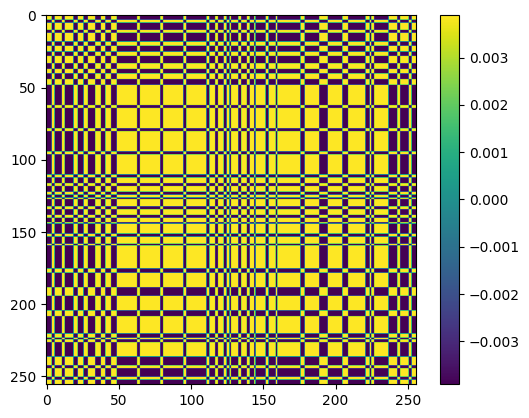

In [64]:
W = compute_W([data])
plt.imshow(W)
plt.colorbar()
plt.savefig("figures/part3_mat_w_cat.svg")
plt.show()

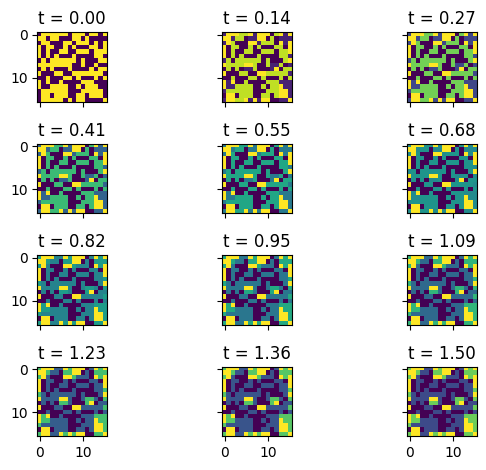

In [65]:
simulate(W)

## Question 3

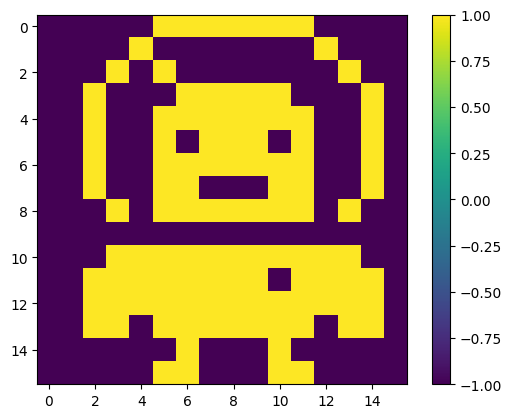

In [66]:
with Image.open("man.png") as im:
    im = im.convert('1')
    data2 = np.array(im) * 2 - 1

plt.imshow(data2)
plt.colorbar()
plt.savefig("figures/part3_man.svg")
plt.show()

data2 = np.reshape(data2, (256, 1))

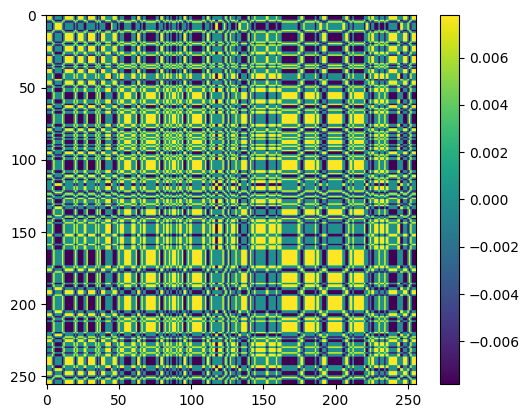

In [67]:
W = compute_W([data, data2])
plt.imshow(W)
plt.colorbar()
plt.savefig("figures/part3_mat_w_cat_man.svg")
plt.show()

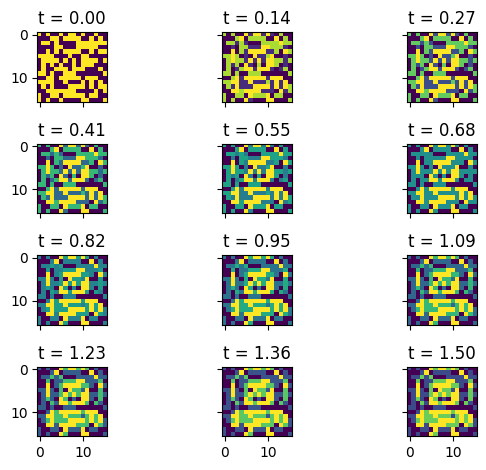

In [68]:
simulate(W)

## Question 4: Recover corrupted pattern

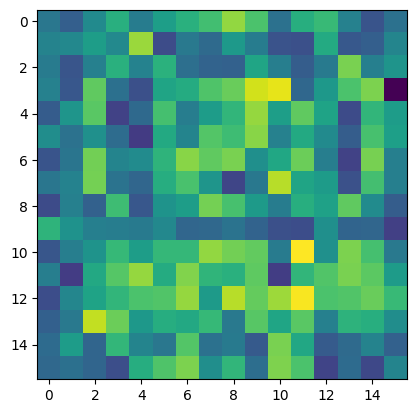

In [69]:
np.random.seed(3995)
sigma = 0.8
corrupted_pattern = data2.astype('float64')
corrupted_pattern += sigma * np.random.normal(size=np.shape(corrupted_pattern))

plt.imshow(np.reshape(corrupted_pattern, (16, 16)))

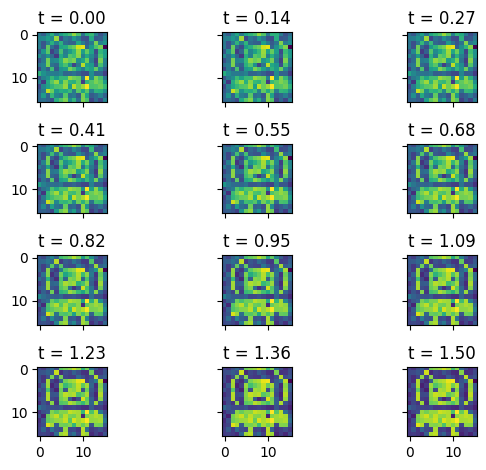

In [70]:
initial_pattern = np.reshape(corrupted_pattern, (1, np.shape(corrupted_pattern)[0]))[0]
simulate(W, initial_pattern)

## Question 6

In [71]:
def generatePattern():
    pass